In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

# Here are the Data Source

In [2]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_CA.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_CA.csv')

In [3]:
confirmed_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/10/2021,3/11/2021,3/12/2021,3/13/2021,3/14/2021,3/15/2021,3/16/2021,3/17/2021,3/18/2021,3/19/2021
0,84006001,US,USA,840,6001,Alameda,California,US,37.646294,-121.892927,...,81658,81747,81866,81969,82034,82116,82168,82258,82368,82460
1,84006003,US,USA,840,6003,Alpine,California,US,38.596786,-119.822359,...,85,85,85,85,85,85,85,85,86,86
2,84006005,US,USA,840,6005,Amador,California,US,38.445831,-120.656960,...,3494,3496,3498,3503,3504,3504,3506,3506,3506,3506
3,84006007,US,USA,840,6007,Butte,California,US,39.667278,-121.600525,...,11092,11096,11110,11126,11131,11140,11141,11141,11141,11141
4,84006009,US,USA,840,6009,Calaveras,California,US,38.205371,-120.552913,...,1941,1941,1944,1944,1944,1946,1951,1958,1963,1968


In [5]:
deaths_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/10/2021,3/11/2021,3/12/2021,3/13/2021,3/14/2021,3/15/2021,3/16/2021,3/17/2021,3/18/2021,3/19/2021
0,84006001,US,USA,840,6001,Alameda,California,US,37.646294,-121.892927,...,1311,1324,1327,1325,1329,1328,1330,1358,1366,1366
1,84006003,US,USA,840,6003,Alpine,California,US,38.596786,-119.822359,...,0,0,0,0,0,0,0,0,0,0
2,84006005,US,USA,840,6005,Amador,California,US,38.445831,-120.656960,...,41,43,44,44,44,44,44,44,44,44
3,84006007,US,USA,840,6007,Butte,California,US,39.667278,-121.600525,...,170,170,185,184,185,185,185,185,185,185
4,84006009,US,USA,840,6009,Calaveras,California,US,38.205371,-120.552913,...,50,50,50,50,50,50,50,50,50,50


In [4]:
cols = confirmed_df.keys()

In [5]:
confirmed = confirmed_df.loc[:, cols[11]:cols[-1]]
deaths = deaths_df.loc[:, cols[11]:cols[-1]]

In [6]:
dates = confirmed.keys()
total_cases = []
total_deaths = [] 
mortality_rate = []
# recovery_rate = [] 
# total_recovered = [] 
# total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
#     recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    total_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
#     total_recovered.append(recovered_sum)
#     total_active.append(confirmed_sum-death_sum-recovered_sum)

In [7]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average


In [8]:
window = 7

In [9]:
# confirmed cases
total_case_avg= moving_average(total_cases, window)
daily_cases = daily_increase(total_cases)
daily_case_avg = moving_average(daily_cases, window)

# deaths
total_death_avg = moving_average(total_deaths, window)
daily_deaths = daily_increase(total_deaths)
daily_death_avg = moving_average(daily_deaths, window)

# recoveries
# world_daily_recovery = daily_increase(total_recovered)
# world_recovery_avg = moving_average(total_recovered, window)
# world_daily_recovery_avg = moving_average(world_daily_recovery, window)

# active 
# world_active_avg = moving_average(total_active, window)

# Current Pandemic Evaluation

In [10]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
total_cases = np.array(total_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
# total_recovered = np.array(total_recovered).reshape(-1, 1)

In [11]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [12]:
start = '1/22/2021'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

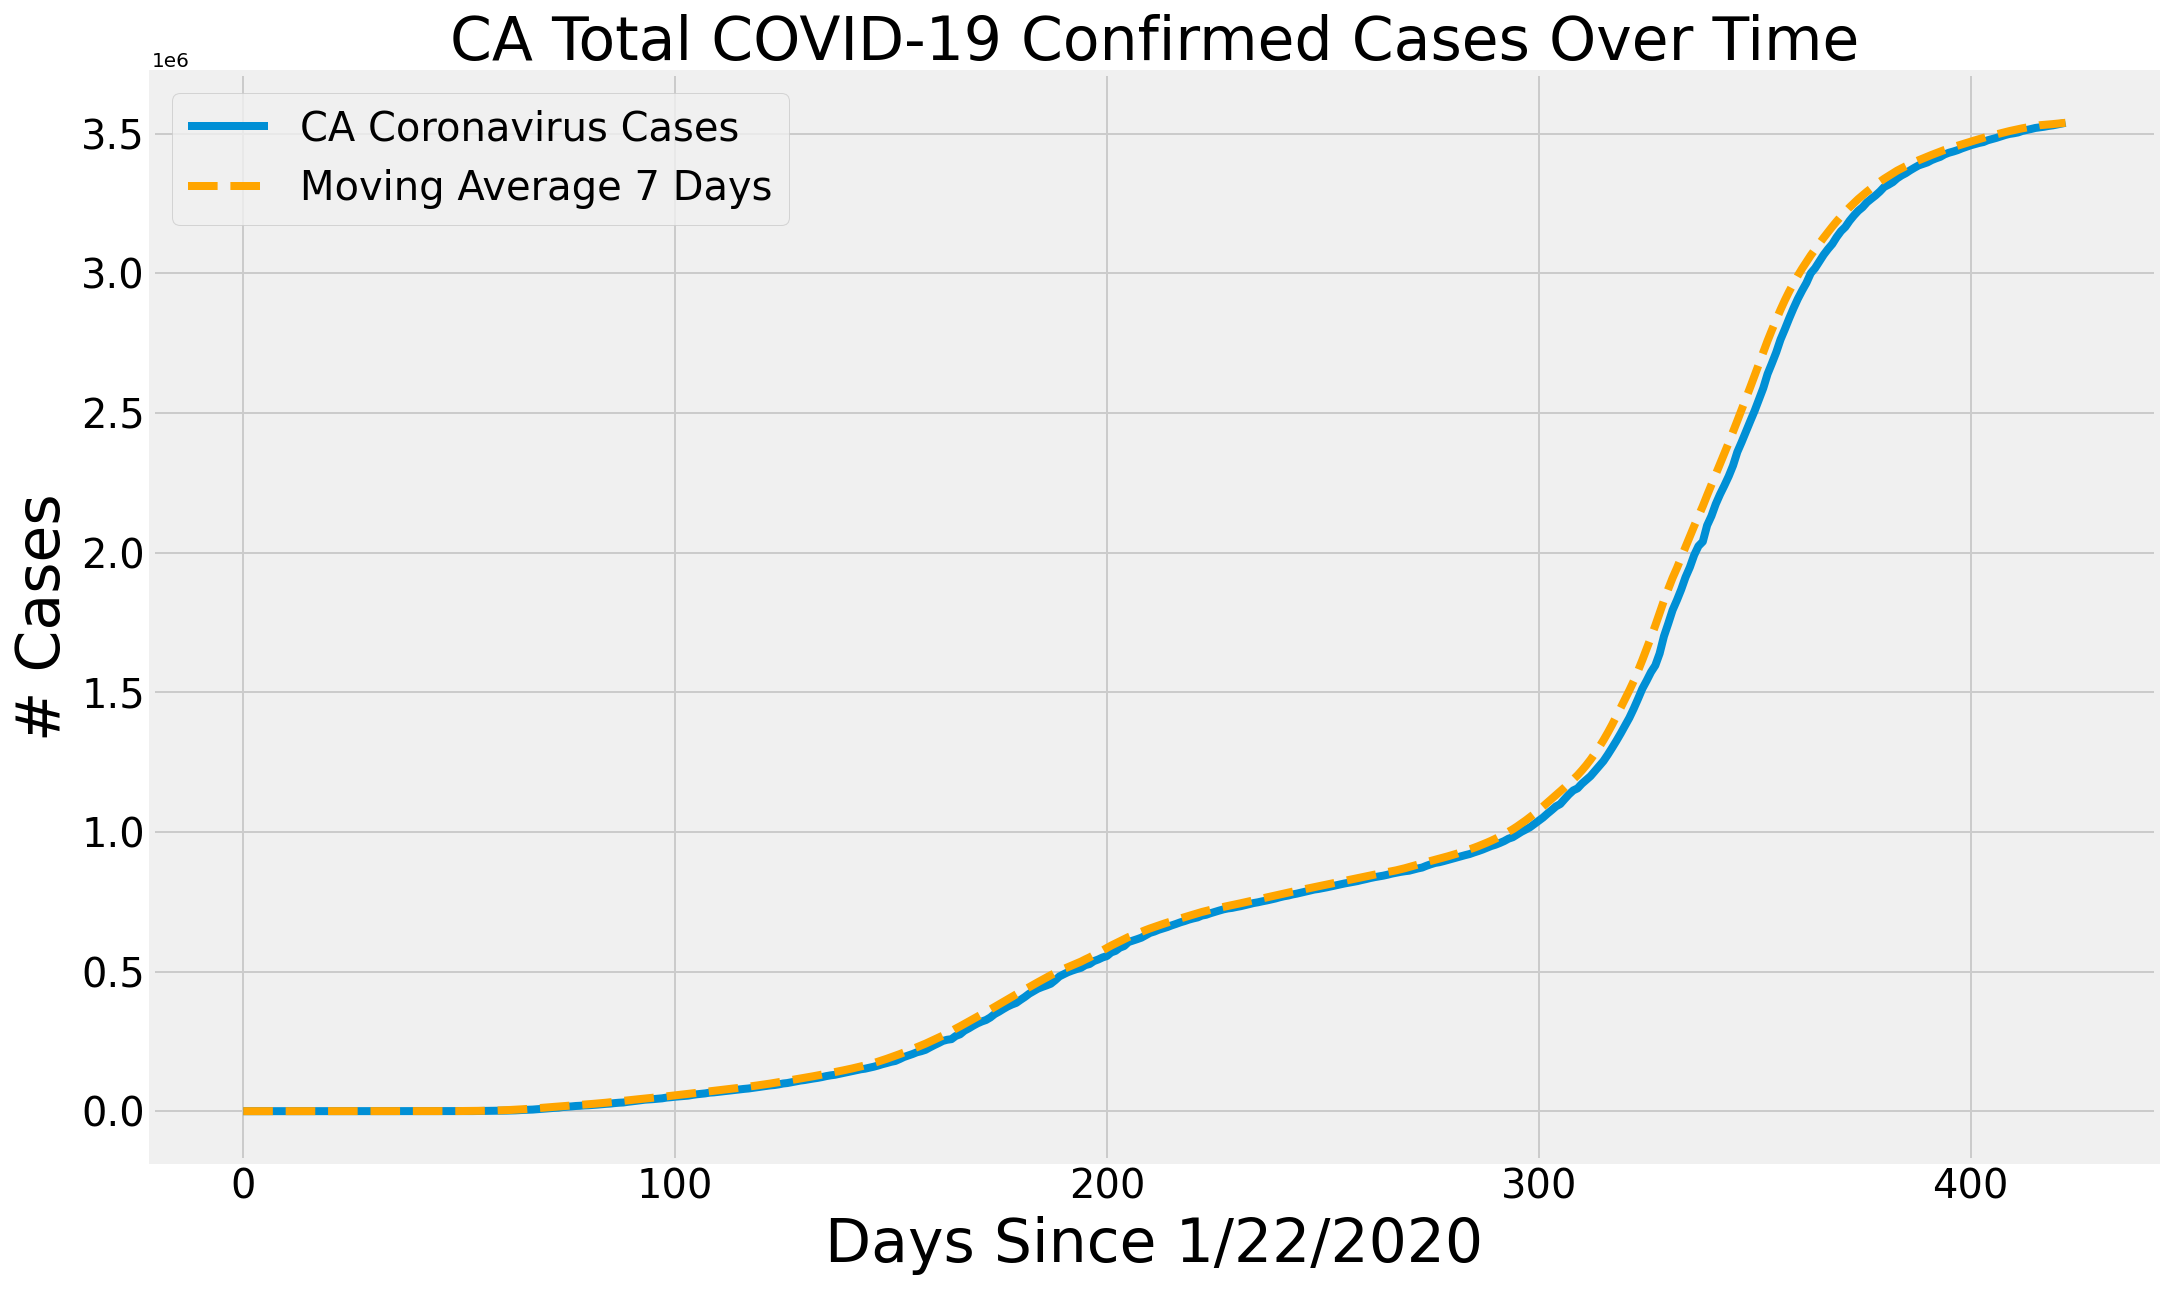

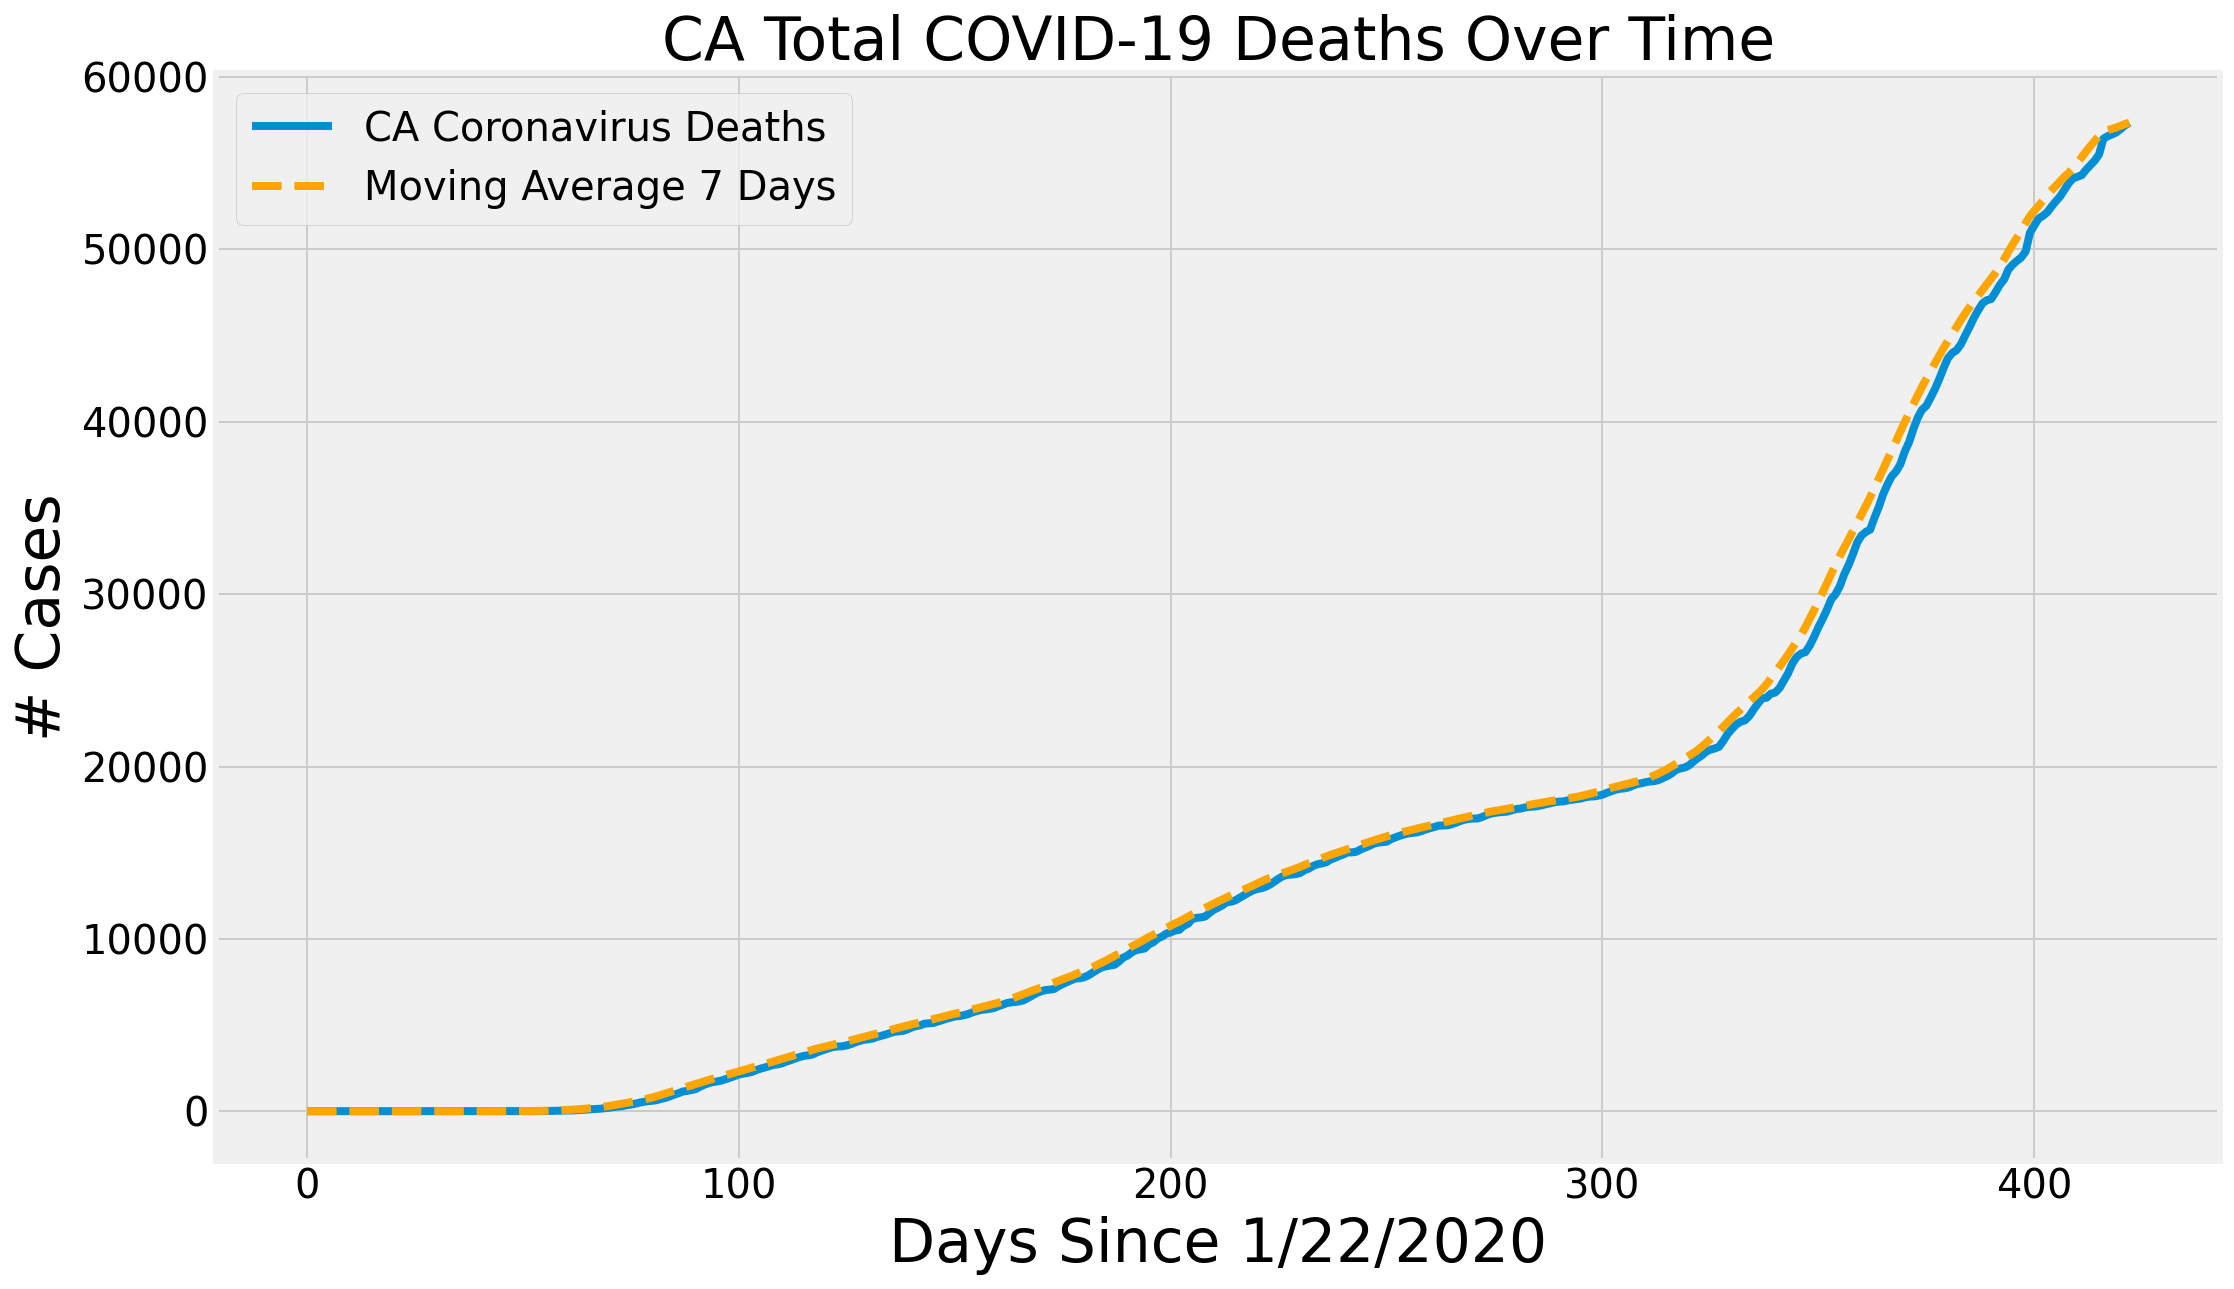

In [13]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_cases)
plt.plot(adjusted_dates, total_case_avg, linestyle='dashed', color='orange')
plt.title('CA Total COVID-19 Confirmed Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# Cases', size=30)
plt.legend(['CA Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, total_death_avg, linestyle='dashed', color='orange')
plt.title('CA Total COVID-19 Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# Cases', size=30)
plt.legend(['CA Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


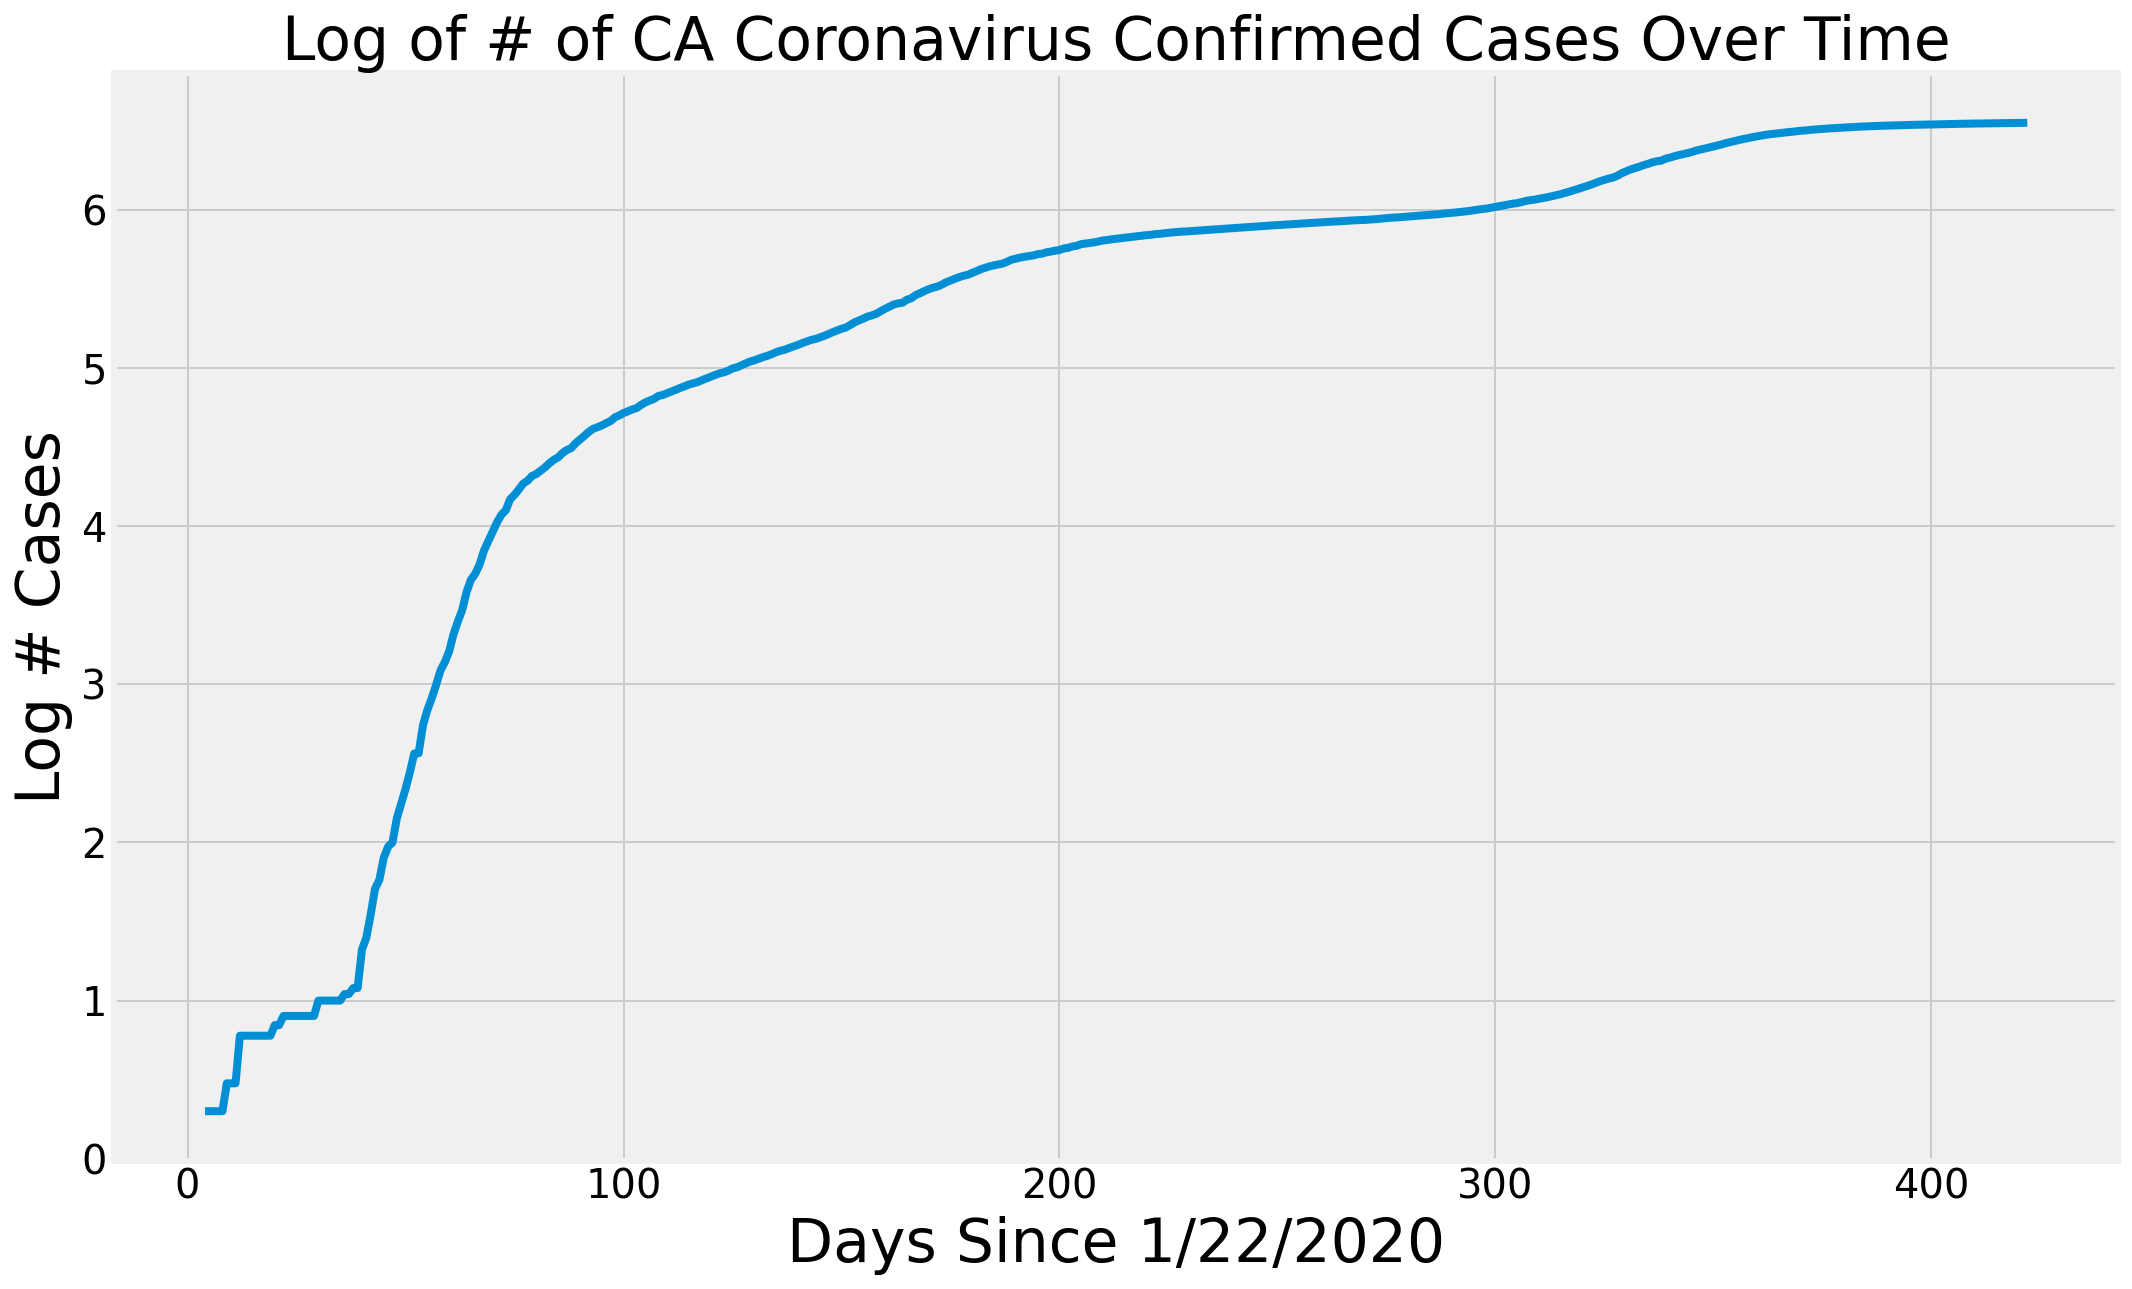

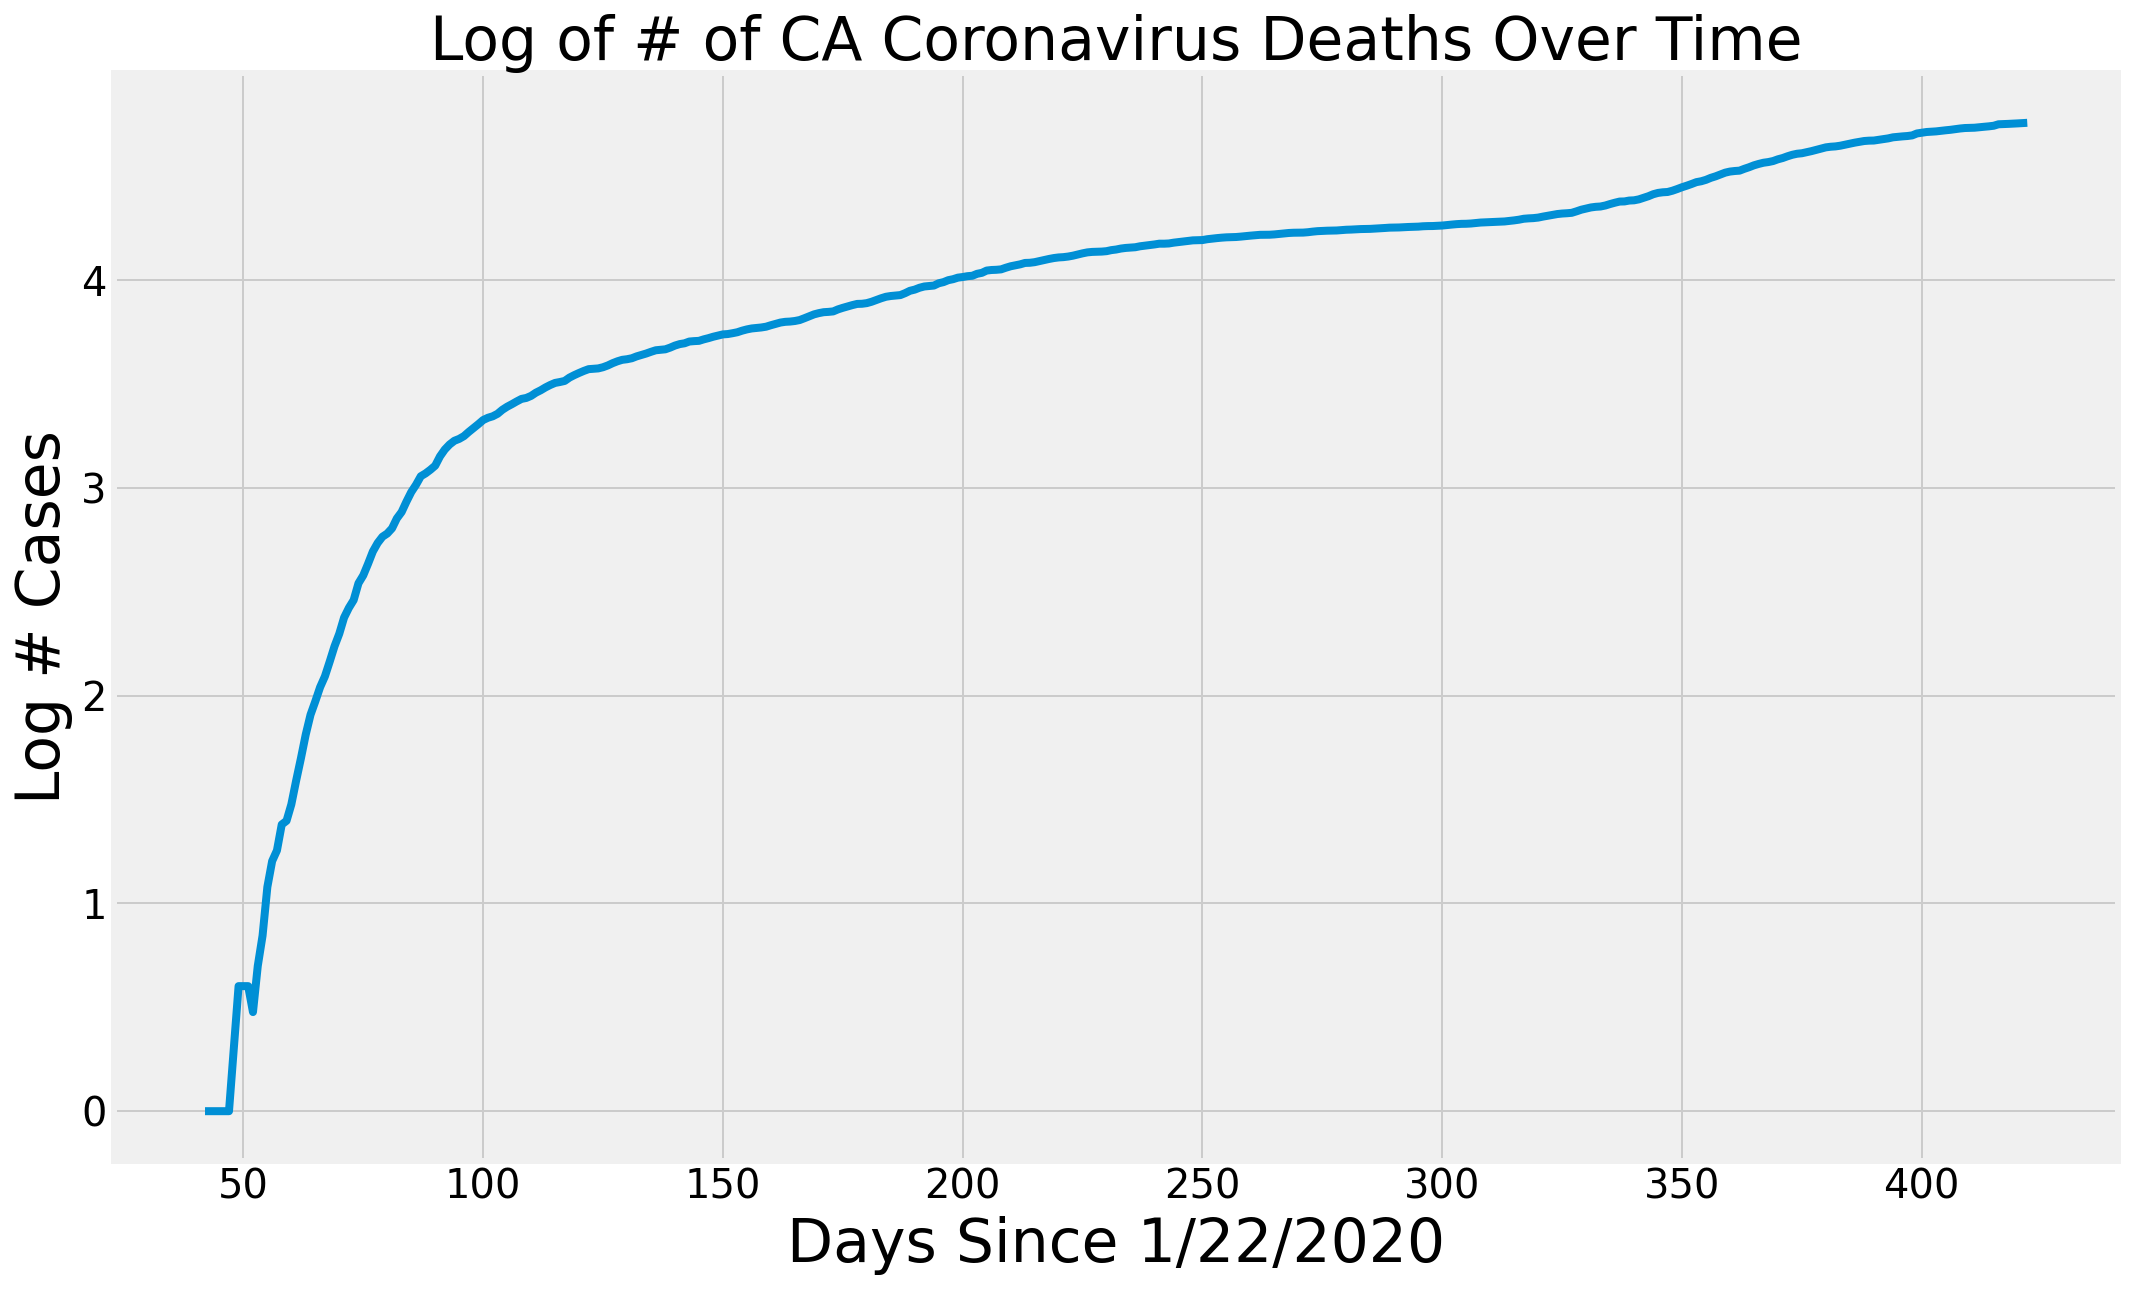

In [14]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_cases))
plt.title('Log of # of CA Coronavirus Confirmed Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Log # Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of CA Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Log # Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# plt.figure(figsize=(16, 10))
# plt.plot(adjusted_dates, np.log10(total_recovered))
# plt.title('Log of # of Coronavirus Recoveries Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()


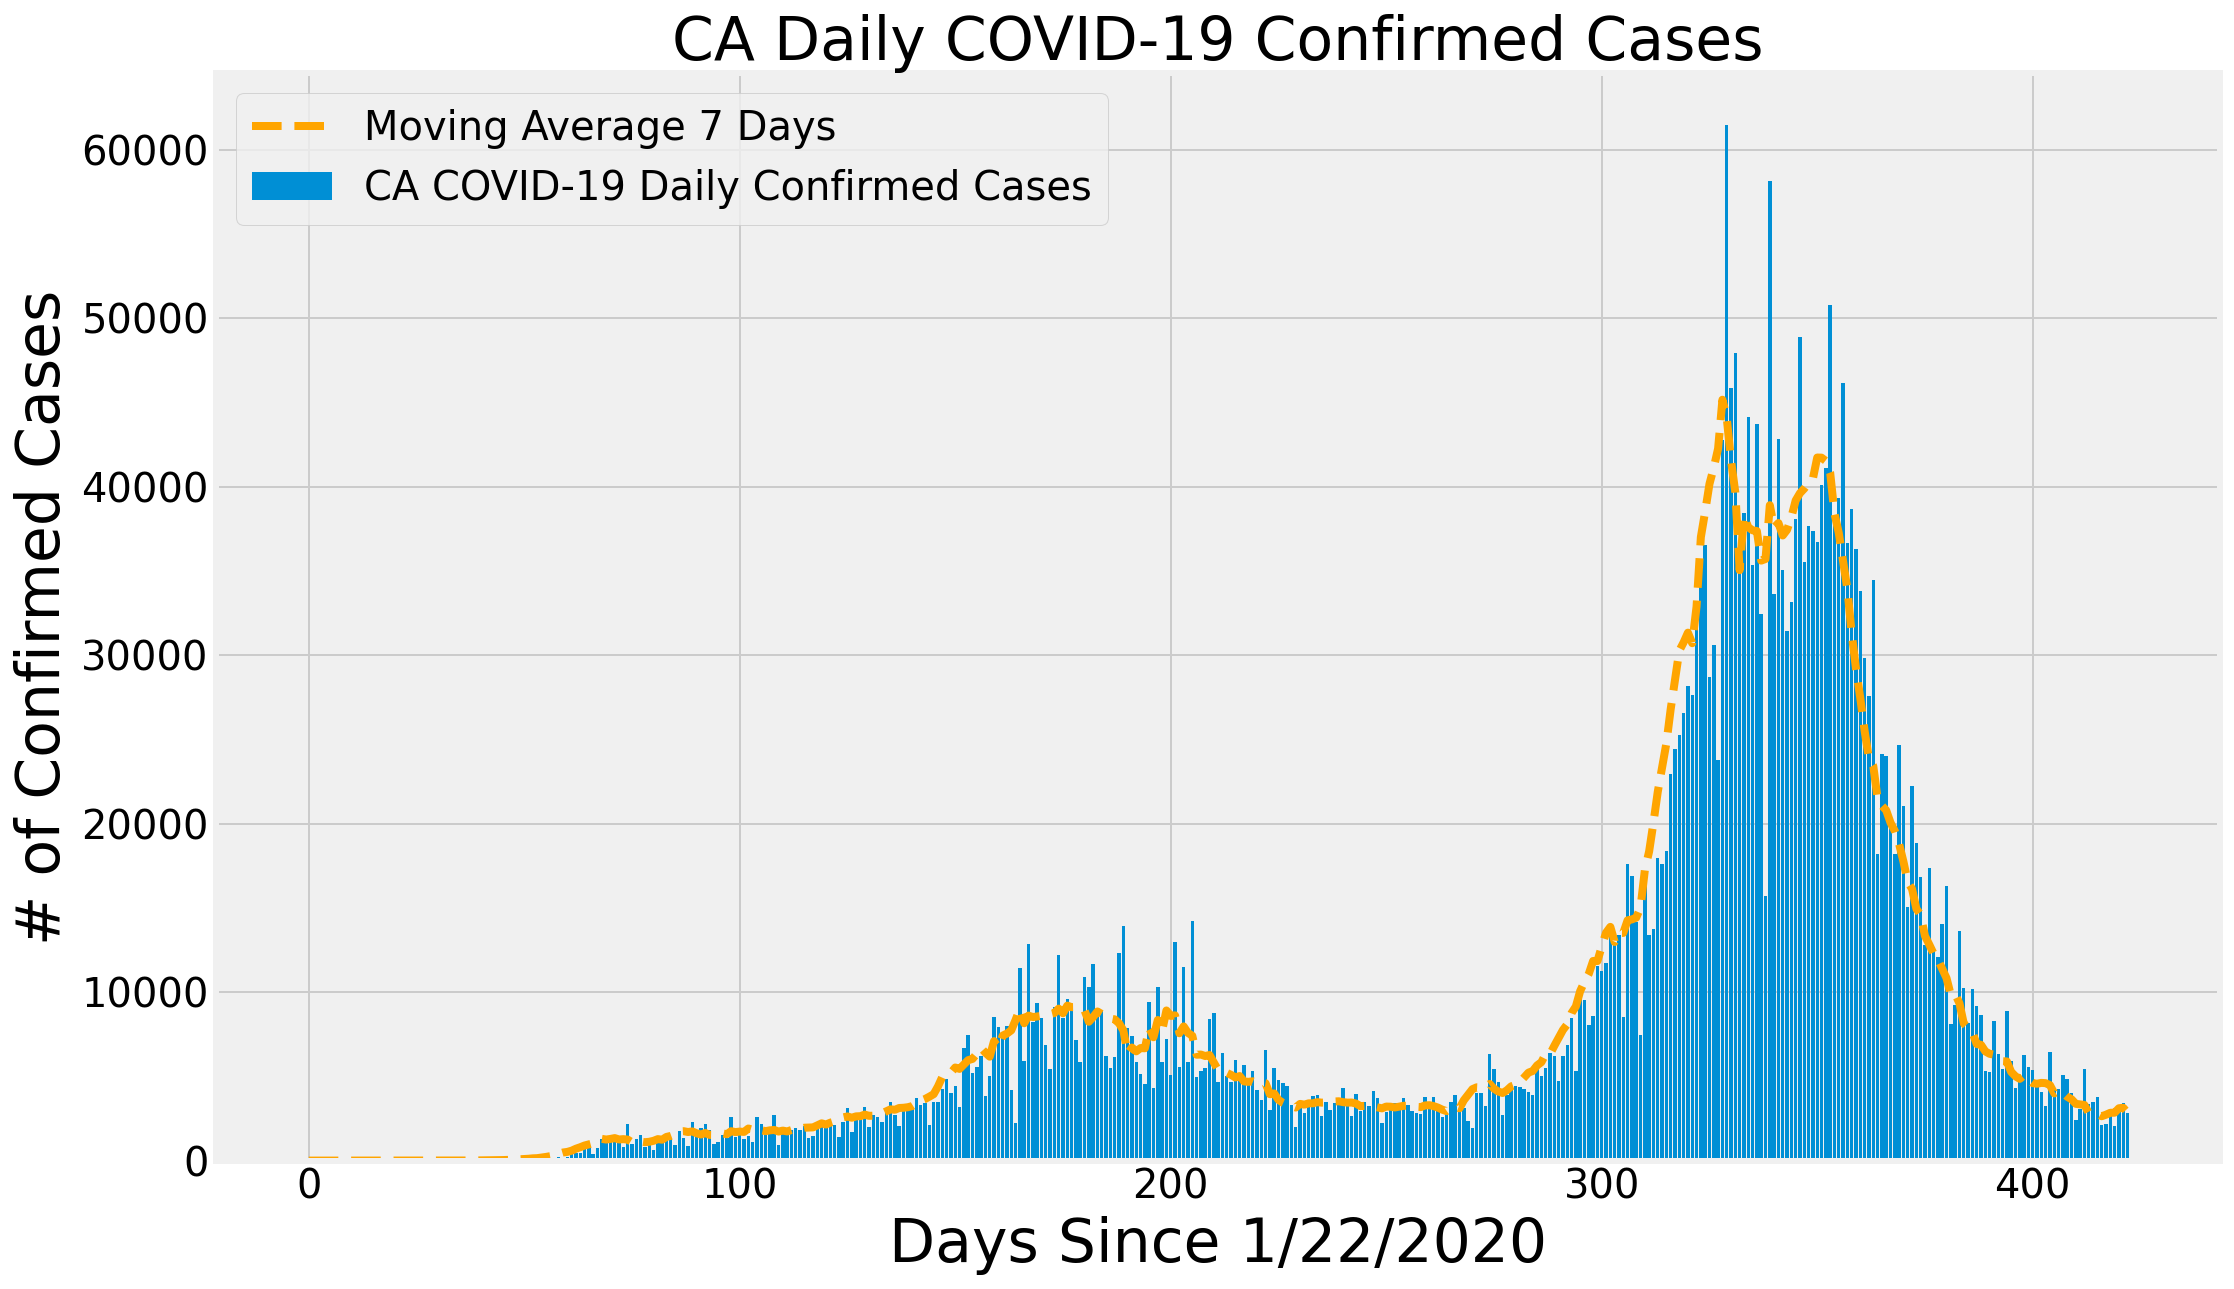

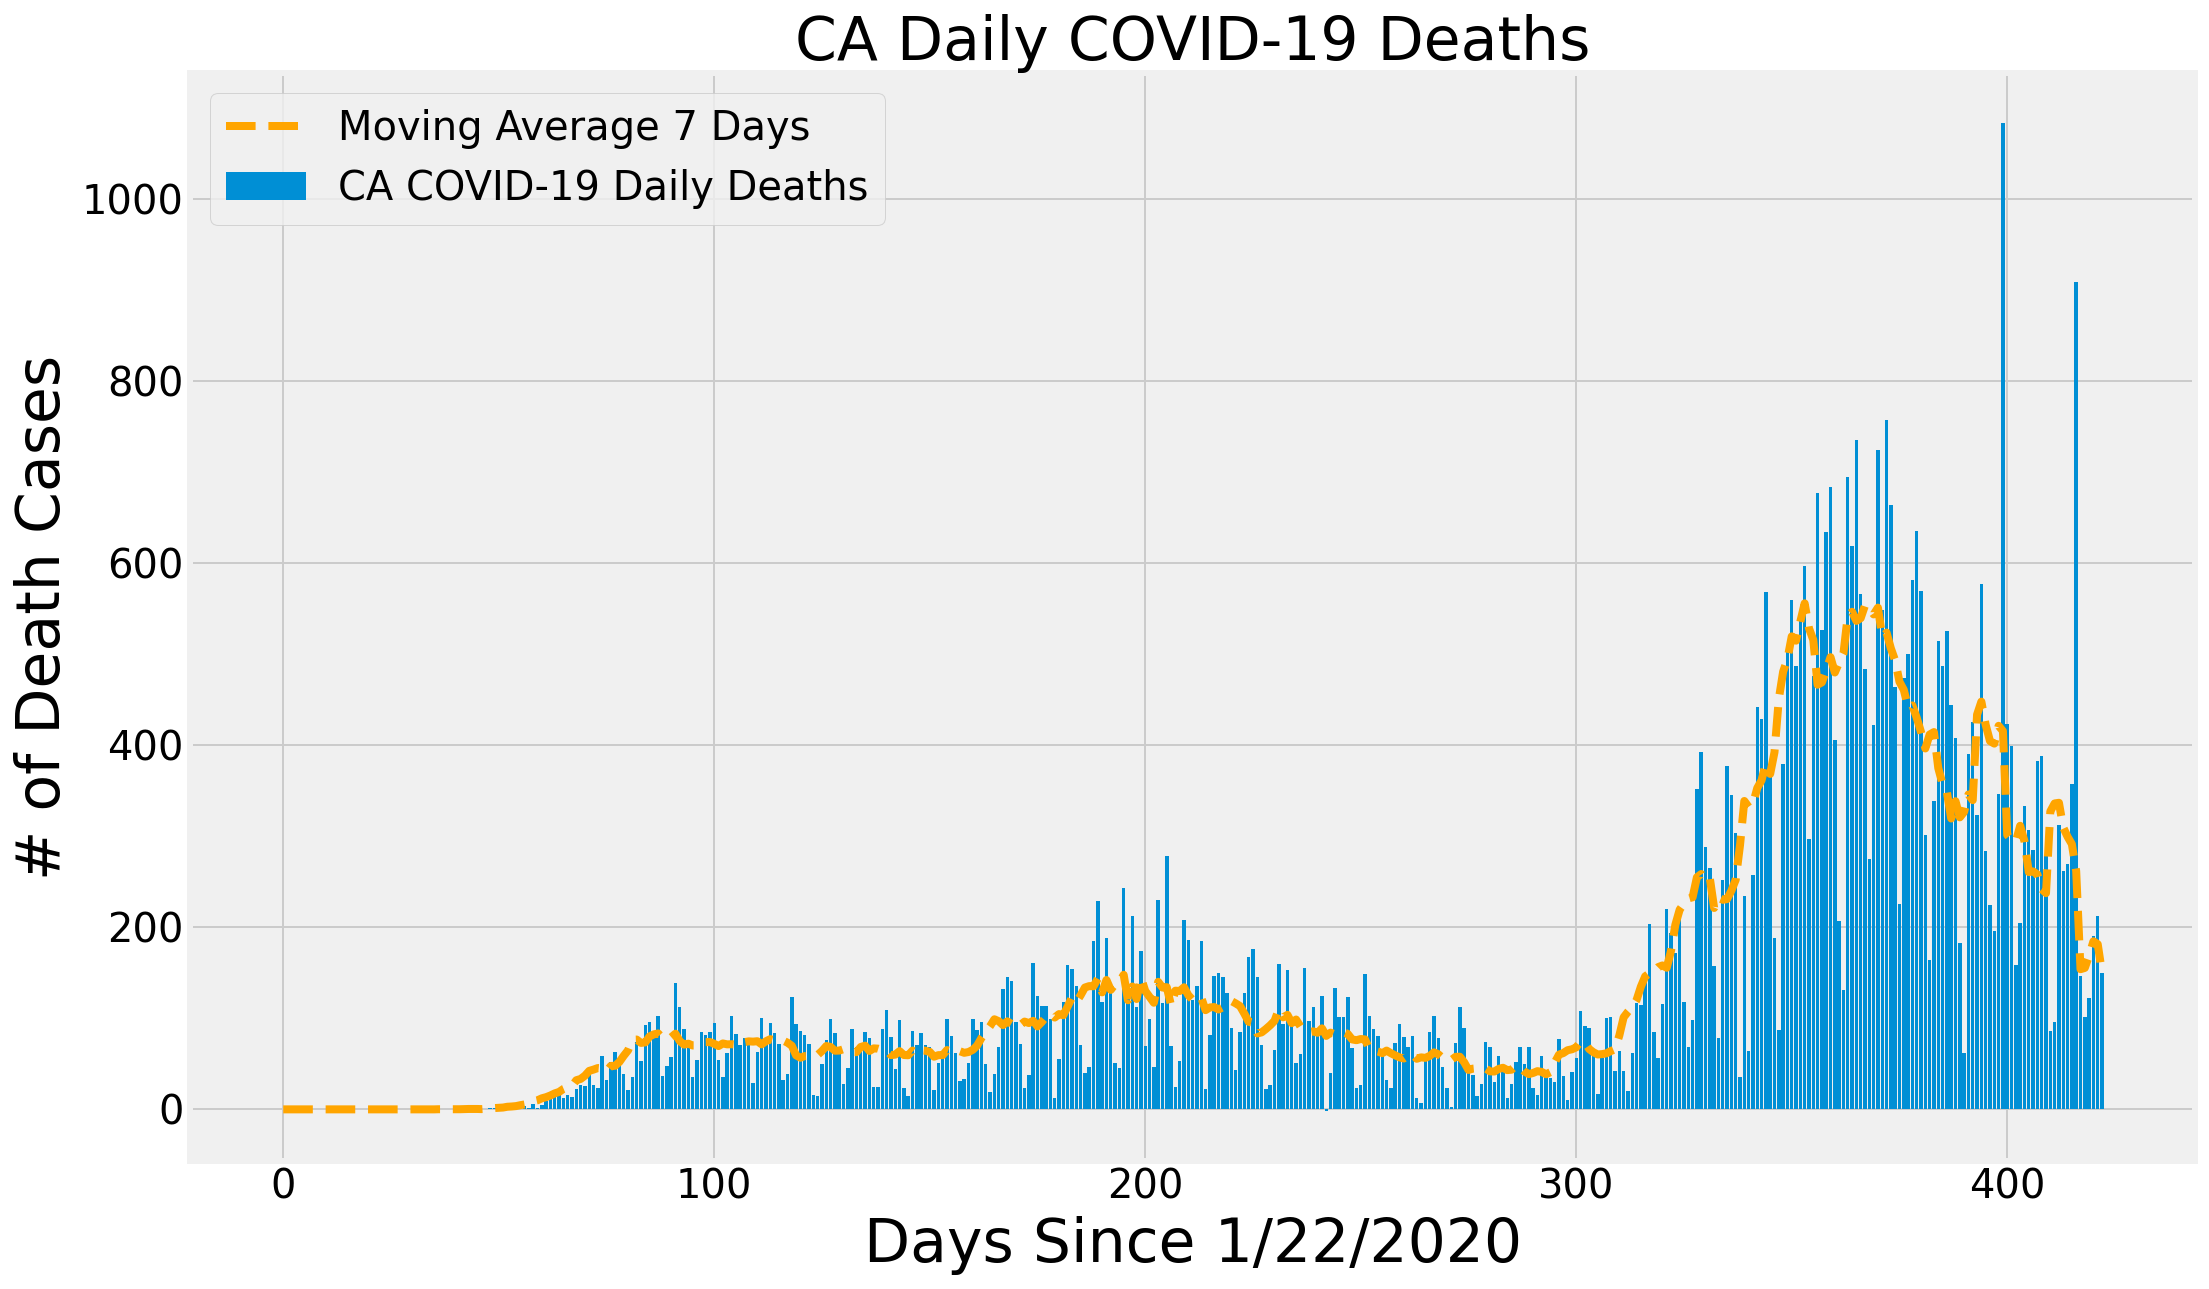

In [18]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, daily_cases)
plt.plot(adjusted_dates, daily_case_avg, color='orange', linestyle='dashed')
plt.title('CA Daily COVID-19 Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'CA COVID-19 Daily Confirmed Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, daily_deaths)
plt.plot(adjusted_dates, daily_death_avg, color='orange', linestyle='dashed')
plt.title('CA Daily COVID-19 Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'CA COVID-19 Daily Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# plt.figure(figsize=(16, 10))
# plt.bar(adjusted_dates, world_daily_recovery)
# plt.plot(adjusted_dates, world_daily_recovery_avg, color='orange', linestyle='dashed')
# plt.title('World Daily Increases in Confirmed Recoveries', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('# of Cases', size=30)
# plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.show()

# Total Confirmed Cases Prediction

In [15]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], total_cases[50:], test_size=0.2, shuffle=False)

# 1. SVM Predictions

In [ ]:
# # use this to find the optimal parameters for SVR
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]

svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR(kernel='poly', degree=3)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 62.6min


In [ ]:
svm_search.best_params_

In [ ]:
svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

In [ ]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

# 2. Polynomial Regression Prediction

In [16]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [17]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 1490166.8025331008
MSE: 4209049581531.7134


In [18]:
print(linear_model.coef_)

[[ 1.68471362e+06 -5.18128315e+04  5.16309407e+02 -1.95195015e+00
   2.61910337e-03]]


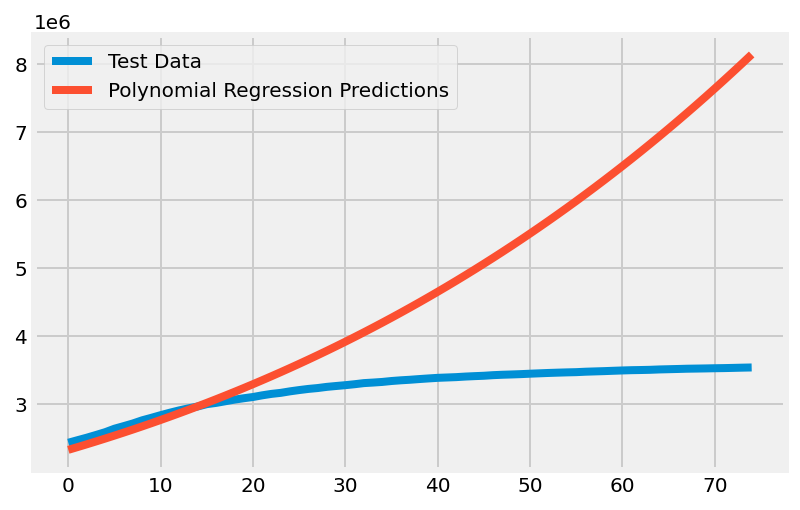

In [19]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

# 3. Bayesian Ridge Polynomial Regression Prediction

In [20]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.7s finished


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [21]:
bayesian_search.best_params_

{'tol': 0.001,
 'normalize': False,
 'lambda_2': 1e-07,
 'lambda_1': 0.001,
 'alpha_2': 0.001,
 'alpha_1': 1e-05}

In [22]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 987447.5134904444
MSE: 1907985020696.0046


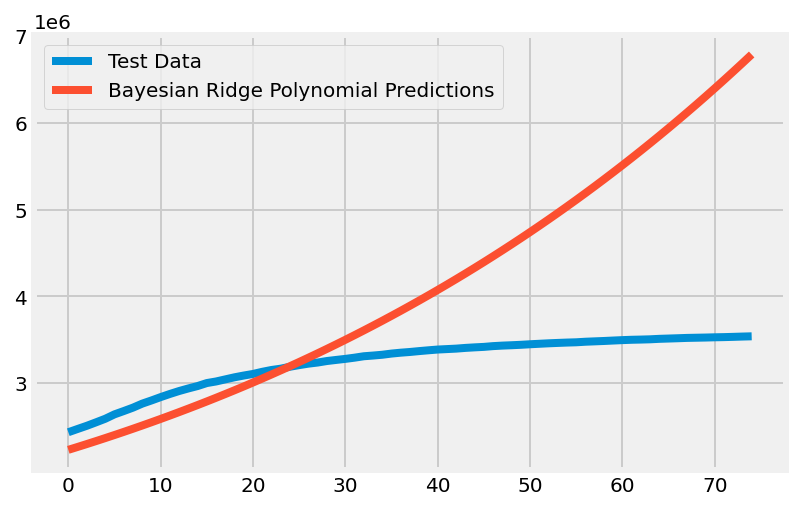

In [23]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [25]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('CA Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [ ]:
plot_predictions(adjusted_dates, total_cases, svm_pred, 'SVM Predictions', 'purple')

In [ ]:
plot_predictions(adjusted_dates, total_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

In [ ]:
plot_predictions(adjusted_dates, total_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [37]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,03/20/2021,151811170.000000
1,03/21/2021,152876054.000000
2,03/22/2021,153945972.000000
3,03/23/2021,155020937.000000
4,03/24/2021,156100960.000000
5,03/25/2021,157186054.000000
6,03/26/2021,158276231.000000
7,03/27/2021,159371502.000000
8,03/28/2021,160471879.000000
9,03/29/2021,161577374.000000


In [28]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of CA Confirmed Cases': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted # of CA Confirmed Cases
0,03/21/2022,8265557.000000
1,03/22/2022,8396542.000000
2,03/23/2022,8529244.000000
3,03/24/2022,8663678.000000
4,03/25/2022,8799860.000000
5,03/26/2022,8937803.000000
6,03/27/2022,9077524.000000
7,03/28/2022,9219037.000000
8,03/29/2022,9362358.000000
9,03/30/2022,9507503.000000


In [29]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of CA Confirmed Cases': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

,Date,Bayesian Ridge Predicted # of CA Confirmed Cases
0,03/21/2022,6888538.000000
1,03/22/2022,6990700.000000
2,03/23/2022,7094232.000000
3,03/24/2022,7199149.000000
4,03/25/2022,7305465.000000
5,03/26/2022,7413193.000000
6,03/27/2022,7522348.000000
7,03/28/2022,7632944.000000
8,03/29/2022,7744997.000000
9,03/30/2022,7858520.000000


# Pendemic Peak Prediction- Daily Confirmed Cases  (Time Series)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Let's load the libraries and dependencies for the deep learning model
from sklearn.preprocessing import MinMaxScaler

#%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD

In [7]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_CA.csv')
confirmed_df = confirmed_df.dropna()
confirmed_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/10/2021,3/11/2021,3/12/2021,3/13/2021,3/14/2021,3/15/2021,3/16/2021,3/17/2021,3/18/2021,3/19/2021
0,84006001,US,USA,840,6001,Alameda,California,US,37.646294,-121.892927,...,81658,81747,81866,81969,82034,82116,82168,82258,82368,82460
1,84006003,US,USA,840,6003,Alpine,California,US,38.596786,-119.822359,...,85,85,85,85,85,85,85,85,86,86
2,84006005,US,USA,840,6005,Amador,California,US,38.445831,-120.656960,...,3494,3496,3498,3503,3504,3504,3506,3506,3506,3506
3,84006007,US,USA,840,6007,Butte,California,US,39.667278,-121.600525,...,11092,11096,11110,11126,11131,11140,11141,11141,11141,11141
4,84006009,US,USA,840,6009,Calaveras,California,US,38.205371,-120.552913,...,1941,1941,1944,1944,1944,1946,1951,1958,1963,1968


In [14]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[11]:cols[-1]]


In [15]:
dates = confirmed.keys()
total_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    
    # confirmed, deaths, recovered, and active
    total_cases.append(confirmed_sum)


In [16]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

In [17]:
window = 7

In [18]:
# confirmed cases
total_case_avg= moving_average(total_cases, window)
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, daily_cases)
plt.plot(adjusted_dates, daily_case_avg, color='orange', linestyle='dashed')
plt.title('CA Daily COVID-19 Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'CA COVID-19 Daily Confirmed Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show() = daily_increase(total_cases)
daily_case_avg = moving_average(daily_cases, window)


In [20]:
# Splitting the train and test set considering 'Open' feature from the dataset
train_data, test_data = confirmed_df.iloc[0:int(len(confirmed_df)*0.8), :], confirmed_df.iloc[int(len(confirmed_df)*0.8):, :]
train_series = train_dataplt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, daily_cases)
plt.plot(adjusted_dates, daily_case_avg, color='orange', linestyle='dashed')
plt.title('CA Daily COVID-19 Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'CA COVID-19 Daily Confirmed Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()
test_series = test_data['Daily Case']
train_series.shape, test_series.shape

NameError: name 'train_dataplt' is not defined

In [ ]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, daily_cases)
plt.plot(adjusted_dates, daily_case_avg, color='orange', linestyle='dashed')
plt.title('CA Daily COVID-19 Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'CA COVID-19 Daily Confirmed Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()